In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import *
import sklearn.metrics as metrics
import pickle

2024-08-19 20:51:25.517522: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-19 20:51:25.519064: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 20:51:25.527034: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 20:51:25.547611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 20:51:25.580070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
tf.__version__

'2.17.0'

In [4]:
data = pd.read_csv('../asset/smart_grid_stability_augmented.csv')

In [5]:
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [6]:
data.shape

(60000, 14)

In [7]:
mapping = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].map(mapping)

In [8]:
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab  stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347      0  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957      1  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471      0  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871      0  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860      0

In [9]:
data = data.drop('stab', axis=1)

In [10]:
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034      0  
1 -1.255012  0.413441  0.862414  0.562139  0.781760      1  
2 -0.920492  0.163041  0.766689  0.839444  0.109853      0  
3 -0.997374  0.446209  0.976744  0.929381  0.362718      0  
4 -0.554305  0.797110  0.455450  0.656947  0.820923      0

In [11]:
X = data.drop('stabf', axis=1)
y = data['stabf']

In [12]:
X.shape, y.shape

((60000, 12), (60000,))

In [13]:
X.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923

In [14]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42000, 12), (18000, 12), (42000,), (18000,))

In [17]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((9000, 12), (9000, 12), (9000,), (9000,))

In [19]:
print("Percentage of stable grid in Training set: ", (y_train[y_train == 1].count() / y_train.count()) * 100, "%")
print("Percentage of stable grid in Testing set: ", (y_test[y_test == 1].count() / y_test.count()) * 100, "%")
print("Percentage of stable grid in Validation set: ", (y_val[y_val == 1].count() / y_val.count()) * 100, "%")

Percentage of stable grid in Training set:  36.18571428571429 %
Percentage of stable grid in Testing set:  36.922222222222224 %
Percentage of stable grid in Validation set:  35.544444444444444 %


In [20]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)

In [21]:
X_train.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
918    7.846974  8.877354  5.843796  5.895582  3.983750 -1.618278 -0.728624   
17141  3.007313  8.684800  6.074018  0.858635  4.230058 -0.773622 -1.937173   
15558  7.992806  4.957976  7.922754  7.774422  3.566676 -0.682930 -1.272413   
27327  2.244237  7.194479  8.293343  7.809539  2.430400 -0.517186 -0.662992   
11606  4.471082  7.895908  7.413906  1.128001  3.221704 -1.950386 -0.598811   

             p4        g1        g2        g3        g4  
918   -1.636848  0.932917  0.581647  0.640909  0.305371  
17141 -1.519263  0.924423  0.941520  0.793961  0.133047  
15558 -1.611333  0.942250  0.818530  0.973506  0.400792  
27327 -1.250222  0.363491  0.136525  0.082320  0.773569  
11606 -0.672507  0.142971  0.820521  0.531451  0.811377

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/aniket/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724080927.138164   24579 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-19 20:52:07.139357: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8146 - loss: 0.3840 - val_accuracy: 0.9332 - val_loss: 0.1658
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9116 - loss: 0.2058 - val_accuracy: 0.9488 - val_loss: 0.1272
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9302 - loss: 0.1671 - val_accuracy: 0.9601 - val_loss: 0.1047
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9349 - loss: 0.1533 - val_accuracy: 0.9660 - val_loss: 0.0929
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9420 - loss: 0.1379 - val_accuracy: 0.9652 - val_loss: 0.0976
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9428 - loss: 0.1325 - val_accuracy: 0.9644 - val_loss: 0.0911
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9438 - loss: 0.1323 - val_accuracy: 0.9699 - val_loss: 0.0844
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9473 - loss: 0.1225 - 

In [26]:
accuracy = model.evaluate(X_test_scaled, y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0592


In [27]:
accuracy

[0.06305267661809921, 0.9758889079093933]

In [28]:
X_test.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
54482  6.547591  6.438867  6.593892  4.357273  3.373254 -0.682392 -1.115608   
43834  9.433586  9.077816  2.227302  2.609427  4.334689 -1.731135 -1.373889   
45667  1.402361  6.245803  3.208440  5.230461  4.499151 -1.377323 -1.224031   
52890  4.714897  3.342714  1.125952  7.394299  4.918754 -1.038290 -1.926761   
41358  4.454121  6.826867  3.633670  9.850580  2.783338 -1.178827 -1.037554   

             p4        g1        g2        g3        g4  
54482 -1.575254  0.572289  0.362432  0.520139  0.443506  
43834 -1.229666  0.505025  0.791719  0.057549  0.994605  
45667 -1.897797  0.191743  0.457570  0.485068  0.056872  
52890 -1.953703  0.967877  0.686775  0.315758  0.339957  
41358 -0.566957  0.672379  0.127205  0.681394  0.757251

In [29]:
X.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923

In [33]:
tau1_val=9.3
tau2_val=4.9 
tau3_val=3.04 
tau4_val=1.36
p1_val=5.06
p2_val=-1.94
p3_val=-1.87
p4_val=-1.25
g1_val=0.41
g2_val=0.86
g3_val=0.56
g4_val=0.78

In [34]:
# test model with new data
new_data = [[tau1_val, tau2_val, tau3_val, tau4_val, p1_val, p2_val, p3_val, p4_val, g1_val, g2_val, g3_val, g4_val]]
new_data_scaled = scalar.transform(new_data)
prediction = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/home/aniket/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
prediction

array([[0.6411766]], dtype=float32)

In [33]:
while True:
    tau1_val = float(input("Enter tau1: "))
    tau2_val = float(input("Enter tau2: "))
    tau3_val = float(input("Enter tau3: "))
    tau4_val = float(input("Enter tau4: "))
    p1_val = float(input("Enter p1: "))
    p2_val = float(input("Enter p2: "))
    p3_val = float(input("Enter p3: "))
    p4_val = float(input("Enter p4: "))
    g1_val = float(input("Enter g1: "))
    g2_val = float(input("Enter g2: "))
    g3_val = float(input("Enter g3: "))
    g4_val = float(input("Enter g4: "))

    new_data = [[tau1_val, tau2_val, tau3_val, tau4_val, p1_val, p2_val, p3_val, p4_val, g1_val, g2_val, g3_val, g4_val]]
    new_data_scaled = scalar.transform(new_data)
    prediction = model.predict(new_data_scaled)
    print(prediction)

    if input("Do you want to continue? (y/n): ") == 'n':
        break

ValueError: could not convert string to float: ''

In [36]:
# what will be the threshold value for the model?
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.6)
cm = confusion_matrix(y_test, y_pred)
cm

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5641,   36],
       [ 215, 3108]])

In [37]:
y_test.value_counts()

stabf
0    5677
1    3323
Name: count, dtype: int64

In [38]:
from tensorflow import lite

In [39]:
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("smart_grid_stability_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp_n1jlkf3/assets


INFO:tensorflow:Assets written to: /tmp/tmp_n1jlkf3/assets


Saved artifact at '/tmp/tmp_n1jlkf3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  125579178905808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125579142379856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125579142377168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125579119723344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125579119726608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125579119728336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125579119728144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125579119728720: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1724081647.079016   24579 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1724081647.079085   24579 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-08-19 21:04:07.079907: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp_n1jlkf3
2024-08-19 21:04:07.081467: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-08-19 21:04:07.081498: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp_n1jlkf3
2024-08-19 21:04:07.094769: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-08-19 21:04:07.097659: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-08-19 21:04:07.192927: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp_n1jlkf3
2024-08-19 21:04:07.217945: I tensorflow/cc/saved_model/loader.cc

50556

In [35]:
data

tau1      tau2      tau3      tau4        p1        p2        p3  \
0      2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1      9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2      8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3      0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4      3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797  3.343416 -1.449106 -0.658054   
59996  3.392299  2.954947  1.274827  6.894759  4.349512 -0.952437 -1.663661   
59997  2.364034  8.776391  2.842030  1.008906  4.299976 -0.943884 -1.380719   
59998  9.631511  2.757071  3.994398  7.821347  2.514755 -0.649915 -0.966330   
59999  6.530527  4.349695  6.781790  8.673138  3.492807 -1.532193 -1.390285   

             p4        g1        g2        g3        g4  stabf  
0     -1.723086  0.650456  0.859578  0.887445  0.958034      0  
1     -1.255012  0.413441  0.862414  0.562139  0.781760      1  
2     -0.920492  0.163041  0.766689  0.839444  0.109853      0  
3     -0.997374  0.446209  0.976744  0.929381  0.362718      0  
4     -0.554305  0.797110  0.455450  0.656947  0.820923      0  
...         ...       ...       ...       ...       ...    ...  
59995 -1.236256  0.601709  0.813512  0.779642  0.608385      0  
59996 -1.733414  0.502079  0.285880  0.567242  0.366120      1  
59997 -1.975373  0.487838  0.149286  0.986505  0.145984      1  
59998 -0.898510  0.365246  0.889118  0.587558  0.818391      0  
59999 -0.570329  0.073056  0.378761  0.505441  0.942631      0  

[60000 rows x 13 columns]

In [45]:
# find mean and standard deviation of each column
mean = data.mean()
std = data.std()

In [46]:
mean

tau1     5.250000
tau2     5.250001
tau3     5.250001
tau4     5.250001
p1       3.750000
p2      -1.250000
p3      -1.250000
p4      -1.250000
g1       0.525000
g2       0.525000
g3       0.525000
g4       0.525000
stabf    0.362000
dtype: float64

In [47]:
std

tau1     2.742434
tau2     2.742437
tau3     2.742437
tau4     2.742437
p1       0.752129
p2       0.433017
p3       0.433017
p4       0.433017
g1       0.274244
g2       0.274243
g3       0.274243
g4       0.274243
stabf    0.480583
dtype: float64

In [40]:
# Python code to test TFLite model
import numpy as np
import tensorflow as tf



In [41]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/home/aniket/Desktop/SE/Urjasantulan_SE_Project/backend/notebook/smart_grid_stability_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Provide the input as a numpy array
input_data = np.array([[9.3040972346785, 4.90252411201167, 3.04754072762177, 1.36935735529605, 5.06781210427845, -1.94005842705193, -1.87274168559721, -1.25501199162931, 0.41344056837935, 0.862414076352903, 0.562139050527675, 0.781759910653126]], dtype=np.float32)




INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [48]:
# StandardScaler for input data
mean = mean[:-1]

In [63]:
mean[:-1]

tau1    5.250000
tau2    5.250001
tau3    5.250001
tau4    5.250001
p1      3.750000
p2     -1.250000
p3     -1.250000
p4     -1.250000
g1      0.525000
g2      0.525000
g3      0.525000
g4      0.525000
dtype: float64

In [49]:
std = std[:-1]

In [50]:
mean

tau1    5.250000
tau2    5.250001
tau3    5.250001
tau4    5.250001
p1      3.750000
p2     -1.250000
p3     -1.250000
p4     -1.250000
g1      0.525000
g2      0.525000
g3      0.525000
g4      0.525000
dtype: float64

In [51]:
# make array of mean and std
mean = mean.values
std = std.values

In [52]:
std

array([2.7424341 , 2.74243694, 2.74243694, 2.74243694, 0.75212876,
       0.43301694, 0.43301694, 0.43301694, 0.2742441 , 0.27424343,
       0.27424343, 0.27424343])

In [53]:
mean

array([ 5.24999993,  5.25000054,  5.25000054,  5.25000054,  3.74999996,
       -1.24999999, -1.24999999, -1.24999999,  0.52499979,  0.52500023,
        0.52500023,  0.52500023])

In [54]:
# standardize the input data
input_data = (input_data - mean) / std

In [55]:
input_data

array([[ 1.47828429, -0.12670357, -0.8031032 , -1.41503461,  1.75210957,
        -1.59360622, -1.43814632, -0.01157472, -0.40678808,  1.23034429,
         0.13542277,  0.93624738]])

In [58]:
# Normalize input_data if necessary
# input_data = (input_data - mean) / std

# interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# The function get_tensor() returns a copy of the tensor data.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.0001036]]


In [59]:
output_data

array([[0.0001036]], dtype=float32)

In [60]:
interpreter.get_input_details()

[{'name': 'serving_default_keras_tensor:0',
  'index': 0,
  'shape': array([ 1, 12], dtype=int32),
  'shape_signature': array([-1, 12], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [61]:
interpreter.predict(input_data)

AttributeError: 'Interpreter' object has no attribute 'predict'

In [83]:
# tflite is not working properly
# need to check the input data and output data
# need to check the model

# save the model
model.save('smart_grid_stability_model.h5')

# load the model
model = tf.keras.models.load_model('smart_grid_stability_model.h5')

# save the scalar
pickle.dump(scalar, open('smart_grid_stability_scalar.pkl', 'wb'))

# load the scalar
scalar = pickle.load(open('smart_grid_stability_scalar.pkl', 'rb'))

# test the model
new_data = [[9.3040972346785, 4.90252411201167, 3.04754072762177, 1.36935735529605, 5.06781210427845, -1.94005842705193, -1.87274168559721, -1.25501199162931, 0.41344056837935, 0.862414076352903, 0.562139050527675, 0.781759910653126]]

new_data_scaled = scalar.transform(new_data)
prediction = model.predict(new_data_scaled)
print(prediction)

/home/aniket/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[0.861406]]


In [85]:
# Python code to test TFLite model
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/home/aniket/Desktop/SE/Urjasantulan_SE_Project/backend/asset/smart_grid_stability_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Provide the input as a numpy array
input_data = np.array([[9.3040972346785, 4.90252411201167, 3.04754072762177, 1.36935735529605, 5.06781210427845, -1.94005842705193, -1.87274168559721, -1.25501199162931, 0.41344056837935, 0.862414076352903, 0.562139050527675, 0.781759910653126]], dtype=np.float32)

# Normalize input_data if necessary
# input_data = (input_data - mean) / std

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# The function get_tensor() returns a copy of the tensor data.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[2.2727674e-07]]


In [91]:
input_data=np.array([[6.71016636762265,3.76520418352323,6.92931443867021,8.81856192345691,2.39741922937942,-0.614589561907959,-1.20882589139371,-0.574003776077751,0.177889561089242,0.397976580119618,0.402045952122677,0.376630279179848]],dtype=np.float32)


In [98]:
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# The function get_tensor() returns a copy of the tensor data.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

ValueError: Cannot set tensor: Dimension mismatch. Got 3 but expected 1 for dimension 0 of input 0.

In [95]:
# take input from csv file and make array
input_data = np.array([[6.71016636762265,3.76520418352323,6.92931443867021,8.81856192345691,2.39741922937942,-0.614589561907959,-1.20882589139371,-0.574003776077751,0.177889561089242,0.397976580119618,0.402045952122677,0.376630279179848]],dtype=np.float32)



In [119]:
data = pd.read_csv('/home/aniket/Desktop/SE/Urjasantulan_SE_Project/backend/asset/smart_grid_stability_augmented.csv')

In [120]:
data

tau1      tau2      tau3      tau4        p1        p2        p3  \
0      2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1      9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2      8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3      0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4      3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797  3.343416 -1.449106 -0.658054   
59996  3.392299  2.954947  1.274827  6.894759  4.349512 -0.952437 -1.663661   
59997  2.364034  8.776391  2.842030  1.008906  4.299976 -0.943884 -1.380719   
59998  9.631511  2.757071  3.994398  7.821347  2.514755 -0.649915 -0.966330   
59999  6.530527  4.349695  6.781790  8.673138  3.492807 -1.532193 -1.390285   

             p4        g1        g2        g3        g4      stab     stabf  
0     -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1     -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2     -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3     -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4     -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
...         ...       ...       ...       ...       ...       ...       ...  
59995 -1.236256  0.601709  0.813512  0.779642  0.608385  0.023892  unstable  
59996 -1.733414  0.502079  0.285880  0.567242  0.366120 -0.025803    stable  
59997 -1.975373  0.487838  0.149286  0.986505  0.145984 -0.031810    stable  
59998 -0.898510  0.365246  0.889118  0.587558  0.818391  0.037789  unstable  
59999 -0.570329  0.073056  0.378761  0.505441  0.942631  0.045263  unstable  

[60000 rows x 14 columns]

In [66]:
# data = data.drop('stab', axis=1)
data = data.drop('stabf', axis=1)

In [67]:
data

tau1      tau2      tau3      tau4        p1        p2        p3  \
0      2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1      9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2      8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3      0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4      3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797  3.343416 -1.449106 -0.658054   
59996  3.392299  2.954947  1.274827  6.894759  4.349512 -0.952437 -1.663661   
59997  2.364034  8.776391  2.842030  1.008906  4.299976 -0.943884 -1.380719   
59998  9.631511  2.757071  3.994398  7.821347  2.514755 -0.649915 -0.966330   
59999  6.530527  4.349695  6.781790  8.673138  3.492807 -1.532193 -1.390285   

             p4        g1        g2        g3        g4  
0     -1.723086  0.650456  0.859578  0.887445  0.958034  
1     -1.255012  0.413441  0.862414  0.562139  0.781760  
2     -0.920492  0.163041  0.766689  0.839444  0.109853  
3     -0.997374  0.446209  0.976744  0.929381  0.362718  
4     -0.554305  0.797110  0.455450  0.656947  0.820923  
...         ...       ...       ...       ...       ...  
59995 -1.236256  0.601709  0.813512  0.779642  0.608385  
59996 -1.733414  0.502079  0.285880  0.567242  0.366120  
59997 -1.975373  0.487838  0.149286  0.986505  0.145984  
59998 -0.898510  0.365246  0.889118  0.587558  0.818391  
59999 -0.570329  0.073056  0.378761  0.505441  0.942631  

[60000 rows x 12 columns]

In [68]:
# make array of above data
input_data = np.array(data, dtype=np.float32)

In [69]:
input_data

array([[2.95906   , 3.0798852 , 8.381025  , ..., 0.85957813, 0.8874449 ,
        0.958034  ],
       [9.304097  , 4.902524  , 3.0475407 , ..., 0.86241406, 0.56213903,
        0.7817599 ],
       [8.971707  , 8.848429  , 3.0464787 , ..., 0.76668864, 0.83944404,
        0.10985325],
       ...,
       [2.3640342 , 8.776391  , 2.8420303 , ..., 0.14928646, 0.9865053 ,
        0.14598404],
       [9.631511  , 2.757071  , 3.9943976 , ..., 0.8891184 , 0.58755755,
        0.8183913 ],
       [6.5305266 , 4.349695  , 6.78179   , ..., 0.37876093, 0.50544107,
        0.9426308 ]], dtype=float32)

In [99]:
# include more data
input_data = np.array([[6.71016636762265,3.76520418352323,6.92931443867021,8.81856192345691,2.39741922937942,-0.614589561907959,-1.20882589139371,-0.574003776077751,0.177889561089242,0.397976580119618,0.402045952122677,0.376630279179848],
[6.71016636762265,3.76520418352323,6.92931443867021,8.81856192345691,2.39741922937942,-0.614589561907959,-1.20882589139371,-0.574003776077751,0.177889561089242,0.397976580119618,0.402045952122677,0.376630279179848],
[6.71016636762265,3.76520418352323,6.92931443867021,8.81856192345691,2.39741922937942,-0.614589561907959,-1.20882589139371,-0.574003776077751,0.177889561089242,0.397976580119618,0.402045952122677,0.376630279179848]],dtype=np.float32)


In [70]:
for sample in input_data:
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1))
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    print(output)


[[8.5847334e-13]]
[[0.0001036]]
[[1.746259e-08]]
[[2.846278e-09]]
[[7.745808e-11]]
[[9.321556e-09]]
[[3.826537e-09]]
[[3.4165433e-09]]
[[1.2009802e-07]]
[[6.459368e-12]]
[[3.9026062e-08]]
[[4.7235567e-09]]
[[8.408521e-06]]
[[1.08960224e-13]]
[[1.224644e-11]]
[[1.8258572e-10]]
[[4.1689808e-11]]
[[1.2854032e-06]]
[[4.0031126e-10]]
[[1.0712115e-08]]
[[2.4569469e-09]]
[[6.2403833e-06]]
[[2.0837113e-10]]
[[2.7502605e-08]]
[[6.9562606e-11]]
[[1.6884888e-08]]
[[4.6656745e-10]]
[[2.222218e-07]]
[[6.612542e-10]]
[[4.2425237e-11]]
[[2.8997783e-06]]
[[3.3530495e-07]]
[[2.5381906e-08]]
[[1.6796907e-08]]
[[1.1962029e-10]]
[[5.313515e-07]]
[[1.0036949e-09]]
[[1.1425764e-11]]
[[2.3508985e-06]]
[[5.1431875e-10]]
[[3.4129574e-11]]
[[2.3428096e-11]]
[[2.2639137e-11]]
[[1.0553045e-07]]
[[7.253113e-10]]
[[1.18916335e-08]]
[[4.2613726e-10]]
[[8.078945e-09]]
[[3.912477e-10]]
[[1.2562483e-09]]
[[2.1017351e-08]]
[[1.6134306e-08]]
[[7.0896973e-12]]
[[2.380961e-11]]
[[2.341271e-09]]
[[2.2869765e-11]]
[[6.407446

In [93]:
data = pd.read_csv('/home/aniket/Desktop/SE/Urjasantulan_SE_Project/backend/asset/smart_grid_stability_augmented.csv')

In [72]:
data.stabf

0        unstable
1          stable
2        unstable
3        unstable
4        unstable
           ...   
59995    unstable
59996      stable
59997      stable
59998    unstable
59999    unstable
Name: stabf, Length: 60000, dtype: object

In [73]:
# make map of stabf and output array
mapping = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].map(mapping)

In [74]:
data.stabf

0        0
1        1
2        0
3        0
4        0
        ..
59995    0
59996    1
59997    1
59998    0
59999    0
Name: stabf, Length: 60000, dtype: int64

In [75]:
output

array([[1.9848934e-09]], dtype=float32)

In [117]:
for sample in input_data:
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1))
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    # make dictionary of output and stabf
    mapping = {0: 'unstable', 1: 'stable'}
    
    dict_output = {mapping[output[0][0]]}

    print(output)

KeyError: 5.0879093e-12

In [77]:
# Define the mapping dictionary
mapping = {0: 'unstable', 1: 'stable'}

# Iterate over the input data
for sample in input_data:
    # Set the tensor for the interpreter
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1))
    interpreter.invoke()
    
    # Get the output from the interpreter
    output = interpreter.get_tensor(output_details[0]['index'])
    
    # Convert the output to a corresponding stability status
    stability_status = mapping[int(output[0][0])]  # Ensure the correct indexing
    
    # Create the dictionary with the stability status
    dict_output = {"stability": stability_status}
    
    # Print the output and dictionary
    print(f"Raw output: {output}")
    print(f"Mapped output: {dict_output}")


Raw output: [[8.5847334e-13]]
Mapped output: {'stability': 'unstable'}
Raw output: [[0.0001036]]
Mapped output: {'stability': 'unstable'}
Raw output: [[1.746259e-08]]
Mapped output: {'stability': 'unstable'}
Raw output: [[2.846278e-09]]
Mapped output: {'stability': 'unstable'}
Raw output: [[7.745808e-11]]
Mapped output: {'stability': 'unstable'}
Raw output: [[9.321556e-09]]
Mapped output: {'stability': 'unstable'}
Raw output: [[3.826537e-09]]
Mapped output: {'stability': 'unstable'}
Raw output: [[3.4165433e-09]]
Mapped output: {'stability': 'unstable'}
Raw output: [[1.2009802e-07]]
Mapped output: {'stability': 'unstable'}
Raw output: [[6.459368e-12]]
Mapped output: {'stability': 'unstable'}
Raw output: [[3.9026062e-08]]
Mapped output: {'stability': 'unstable'}
Raw output: [[4.7235567e-09]]
Mapped output: {'stability': 'unstable'}
Raw output: [[8.408521e-06]]
Mapped output: {'stability': 'unstable'}
Raw output: [[1.08960224e-13]]
Mapped output: {'stability': 'unstable'}
Raw output: [[1.

In [78]:
for sample in input_data:
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1))
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    # append column to input data
    data['new_stabf'] = output

    print(output)


ValueError: Length of values (1) does not match length of index (60000)

In [118]:
import numpy as np
import pandas as pd

# Convert the input data to a DataFrame
df = pd.DataFrame(input_data, columns=[f'feature_{i+1}' for i in range(input_data.shape[1])])

# Iterate over the input data
new_stabf = []
for sample in input_data:
    # Set the tensor for the interpreter
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1))
    interpreter.invoke()
    
    # Get the output from the interpreter
    output = interpreter.get_tensor(output_details[0]['index'])
    
    # Append the output to the list
    new_stabf.append(output[0][0])  # Assuming output is a scalar in the first element

# Add the output as a new column to the DataFrame
df['new_stabf'] = new_stabf

print(df)


       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       2.959060   3.079885   8.381025   9.780754   3.763085  -0.782604   
1       9.304097   4.902524   3.047541   1.369357   5.067812  -1.940058   
2       8.971707   8.848429   3.046479   1.214518   3.405158  -1.207456   
3       0.716415   7.669600   4.486641   2.340563   3.963791  -1.027473   
4       3.134112   7.608772   4.943759   9.857574   3.525811  -1.125531   
...          ...        ...        ...        ...        ...        ...   
59995   2.930406   2.376523   9.487627   6.187797   3.343416  -1.449106   
59996   3.392299   2.954947   1.274827   6.894759   4.349512  -0.952437   
59997   2.364034   8.776391   2.842030   1.008906   4.299975  -0.943884   
59998   9.631511   2.757071   3.994398   7.821347   2.514755  -0.649915   
59999   6.530527   4.349695   6.781790   8.673139   3.492807  -1.532193   

       feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0      -1.257395  -1.

In [119]:
import numpy as np

# Assuming input_data is a NumPy array
new_stabf = []

# Iterate over the input data
for sample in input_data:
    # Set the tensor for the interpreter
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1))
    interpreter.invoke()
    
    # Get the output from the interpreter
    output = interpreter.get_tensor(output_details[0]['index'])
    
    # Append the output to the list
    new_stabf.append(output[0][0])  # Assuming output is a scalar in the first element

# Convert the list to a NumPy array and reshape it to be a column vector
new_stabf = np.array(new_stabf).reshape(-1, 1)

# Concatenate the new column to the original input_data
input_data_with_stabf = np.hstack((input_data, new_stabf))

print(input_data_with_stabf)


[[2.95905995e+00 3.07988524e+00 8.38102531e+00 ... 8.87444913e-01
  9.58033979e-01 8.58473340e-13]
 [9.30409718e+00 4.90252399e+00 3.04754066e+00 ... 5.62139034e-01
  7.81759918e-01 1.03604158e-04]
 [8.97170734e+00 8.84842873e+00 3.04647875e+00 ... 8.39444041e-01
  1.09853245e-01 1.74625896e-08]
 ...
 [2.36403418e+00 8.77639103e+00 2.84203029e+00 ... 9.86505330e-01
  1.45984039e-01 2.50323862e-02]
 [9.63151073e+00 2.75707102e+00 3.99439764e+00 ... 5.87557554e-01
  8.18391323e-01 4.52808208e-10]
 [6.53052664e+00 4.34969521e+00 6.78178978e+00 ... 5.05441070e-01
  9.42630827e-01 1.98489336e-09]]


In [120]:
data

stabf     new_stabf
0          0  8.584733e-13
1          1  1.036042e-04
2          0  1.746259e-08
3          0  2.846278e-09
4          0  7.745808e-11
...      ...           ...
59995      0  6.765088e-12
59996      1  1.017893e-07
59997      1  2.503239e-02
59998      0  4.528082e-10
59999      0  1.984893e-09

[60000 rows x 2 columns]

In [121]:
# append new column to input data
data['new_stabf'] = new_stabf

/tmp/ipykernel_24579/2390997701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_stabf'] = new_stabf


In [123]:
data

stabf     new_stabf
0          0  8.584733e-13
1          1  1.036042e-04
2          0  1.746259e-08
3          0  2.846278e-09
4          0  7.745808e-11
...      ...           ...
59995      0  6.765088e-12
59996      1  1.017893e-07
59997      1  2.503239e-02
59998      0  4.528082e-10
59999      0  1.984893e-09

[60000 rows x 2 columns]

In [102]:
data = pd.read_csv('/home/aniket/Desktop/SE/Urjasantulan_SE_Project/backend/asset/smart_grid_stability_augmented.csv')

In [103]:
mapping = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].map(mapping)
data.drop('stab', axis=1, inplace=True)

In [113]:
data

tau1      tau2      tau3      tau4        p1        p2        p3  \
0      2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1      9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2      8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3      0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4      3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797  3.343416 -1.449106 -0.658054   
59996  3.392299  2.954947  1.274827  6.894759  4.349512 -0.952437 -1.663661   
59997  2.364034  8.776391  2.842030  1.008906  4.299976 -0.943884 -1.380719   
59998  9.631511  2.757071  3.994398  7.821347  2.514755 -0.649915 -0.966330   
59999  6.530527  4.349695  6.781790  8.673138  3.492807 -1.532193 -1.390285   

             p4        g1        g2        g3        g4  stabf     new_stabf  
0     -1.723086  0.650456  0.859578  0.887445  0.958034      0  8.584733e-13  
1     -1.255012  0.413441  0.862414  0.562139  0.781760      1  1.036042e-04  
2     -0.920492  0.163041  0.766689  0.839444  0.109853      0  1.746259e-08  
3     -0.997374  0.446209  0.976744  0.929381  0.362718      0  2.846278e-09  
4     -0.554305  0.797110  0.455450  0.656947  0.820923      0  7.745808e-11  
...         ...       ...       ...       ...       ...    ...           ...  
59995 -1.236256  0.601709  0.813512  0.779642  0.608385      0  6.765088e-12  
59996 -1.733414  0.502079  0.285880  0.567242  0.366120      1  1.017893e-07  
59997 -1.975373  0.487838  0.149286  0.986505  0.145984      1  2.503239e-02  
59998 -0.898510  0.365246  0.889118  0.587558  0.818391      0  4.528082e-10  
59999 -0.570329  0.073056  0.378761  0.505441  0.942631      0  1.984893e-09  

[60000 rows x 14 columns]

In [114]:
# see range of stab column
data.stabf.value_counts()

stabf
0    38280
1    21720
Name: count, dtype: int64

In [115]:
data

tau1      tau2      tau3      tau4        p1        p2        p3  \
0      2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1      9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2      8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3      0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4      3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797  3.343416 -1.449106 -0.658054   
59996  3.392299  2.954947  1.274827  6.894759  4.349512 -0.952437 -1.663661   
59997  2.364034  8.776391  2.842030  1.008906  4.299976 -0.943884 -1.380719   
59998  9.631511  2.757071  3.994398  7.821347  2.514755 -0.649915 -0.966330   
59999  6.530527  4.349695  6.781790  8.673138  3.492807 -1.532193 -1.390285   

             p4        g1        g2        g3        g4  stabf     new_stabf  
0     -1.723086  0.650456  0.859578  0.887445  0.958034      0  8.584733e-13  
1     -1.255012  0.413441  0.862414  0.562139  0.781760      1  1.036042e-04  
2     -0.920492  0.163041  0.766689  0.839444  0.109853      0  1.746259e-08  
3     -0.997374  0.446209  0.976744  0.929381  0.362718      0  2.846278e-09  
4     -0.554305  0.797110  0.455450  0.656947  0.820923      0  7.745808e-11  
...         ...       ...       ...       ...       ...    ...           ...  
59995 -1.236256  0.601709  0.813512  0.779642  0.608385      0  6.765088e-12  
59996 -1.733414  0.502079  0.285880  0.567242  0.366120      1  1.017893e-07  
59997 -1.975373  0.487838  0.149286  0.986505  0.145984      1  2.503239e-02  
59998 -0.898510  0.365246  0.889118  0.587558  0.818391      0  4.528082e-10  
59999 -0.570329  0.073056  0.378761  0.505441  0.942631      0  1.984893e-09  

[60000 rows x 14 columns]

In [116]:
# find range of new_stabf column
data.new_stabf.value_counts()

new_stabf
3.035402e-08    2
2.307491e-07    2
8.962085e-11    2
5.560496e-07    2
1.563354e-10    2
               ..
1.308881e-08    1
1.364619e-07    1
3.940877e-10    1
2.520153e-09    1
1.984893e-09    1
Name: count, Length: 59790, dtype: int64

In [117]:
# remove all columns except stabf and new_stabf
data = data[['stabf', 'new_stabf']]

In [90]:
data

stabf     new_stabf
0        NaN  8.584733e-13
1        NaN  1.036042e-04
2        NaN  1.746259e-08
3        NaN  2.846278e-09
4        NaN  7.745808e-11
...      ...           ...
59995    NaN  6.765088e-12
59996    NaN  1.017893e-07
59997    NaN  2.503239e-02
59998    NaN  4.528082e-10
59999    NaN  1.984893e-09

[60000 rows x 2 columns]

In [124]:
# ssave the data to csv file
data.to_csv('smart_grid_stability_output.csv', index=False)

In [125]:
new_data = pd.read_csv('smart_grid_stability_output.csv')

In [126]:
import matplotlib.pyplot as plt

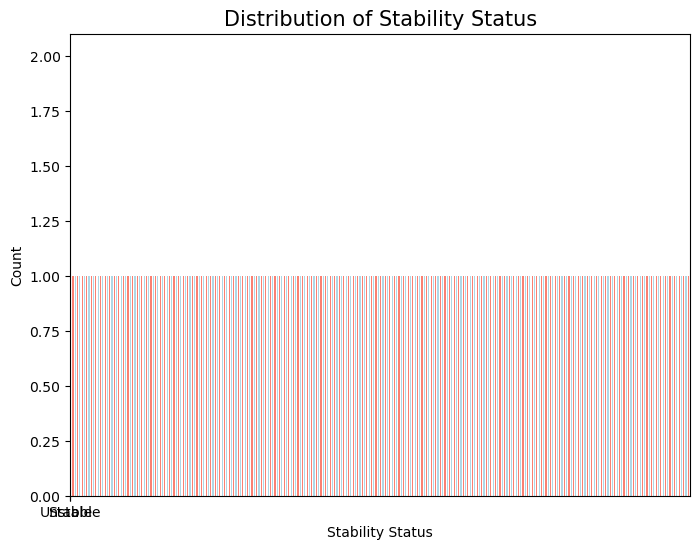

In [127]:
# Plot the distribution of the 'stabf' column
plt.figure(figsize=(8, 6))
new_data['new_stabf'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribution of Stability Status', size=15)
plt.xlabel('Stability Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Unstable', 'Stable'], rotation=0)
plt.show()


In [180]:
new_data = pd.read_csv('smart_grid_stability_output.csv')

In [181]:
threshold = 2.5e-8
# if the value is less than threshold, then it is stable
new_data['new_stabf'] = new_data['new_stabf'].apply(lambda x: 0 if x < threshold else 1)

In [182]:
new_data['new_stabf'].value_counts()

new_stabf
0    36919
1    23081
Name: count, dtype: int64

In [183]:
new_data['stabf'].value_counts()

stabf
0    38280
1    21720
Name: count, dtype: int64